# **ASL Interpretation Model** - Personal ML Project

### For our final project we have decided to make a model (that we can later on turn into an App*)  that can understand sign language (ASL) through uploaded pictures or videos and/or taking pics or a video.
#### This app will bridge the communication between people who use sign language to communicate and those who may not be able to understand it. 
This structure outlines a clear process, starting with static image classification, followed by video analysis and deployment through FastAPI.

## `1. Methodology:`

### Convolutional Neural Network (CNN)
1. A CNN will be used to classify static images of ASL gestures initially.
2. Transfer Learning: Pretrained models like VGG16 or ResNet50 will be leveraged to accelerate training and improve accuracy. These models will be fine-tuned with custom ASL datasets.
### Custom Data & Testing
1. Data: Custom ASL data will be collected or sourced, including gestures in various lighting, angles, and conditions.
2. Testing: The model will be tested on the custom dataset to ensure it generalizes well to new inputs.
### Data Augmentation
The dataset will be augmented (rotations, flips, scaling, etc.) to create up to 100 or even 260 x 26 characters to improve model robustness and prevent overfitting.
### FastAPI Integration
FastAPI will be used to create an API for real-time deployment of the model. The app will allow users to upload pictures or videos for ASL gesture classification.
### Phase 1: Static Images
The initial model will focus on classifying gestures from static images. These images will be preprocessed to extract features (X) and labels (y).
### Phase 2: Video Analysis
After achieving solid performance with static images, the project will shift to dynamic ASL recognition through videos. Techniques like frame extraction and sequence modeling (e.g., CNN+LSTM) will be explored.


## `2. Data:`
Data will be sourced from publicly available datasets, such as ASL Fingerspelling Dataset for static signs Additional data can be collected through user-generated videos to enrich the dataset.


## `3. Deliverables:`

1. A CNN model for ASL gesture classification (static images).
2. An API (FastAPI) for live or uploaded picture interpretation.
3. Comprehensive project documentation and user guidelines.
4. A mobile or web application with functionality to upload pictures or videos, or use the camera for live interpretation of ASL into text or speech.*

## `4. Timeline:`
### Step 1: Research and Planning
Familiarizing with ASL and its nuances since sign language has its own grammar and syntax.
To define the scope, we want to interpret both fingerspelling, full signs.
We are considering that the app will translate both to text or speech.
We are creating the app with both ASL users and non-signers in mind.
### Step 2: Data Collection
We will use an existing ASL dataset and as well as creating our own. Some popular ones include:
1. ASL Fingerspelling Dataset
2. WLASL Dataset
3. Create our own dataset by takng pictures/recording videos of various signed words.
(We need to ensure that our dataset includes diverse signers (different ages, genders, backgrounds) to improve model robustness.)
### Step 3: Preprocessing Data
When working with videos, we will need to extract frames. We might consider using OpenCV or similar libraries for frame extraction.
We will annotate the data accurately; this could be signs, words, or sentences.
We will normalize the video input (resize, grayscale, etc.) to ensure uniformity across our dataset.
### Step 4: Model Selection
Choosing a Model: We will use Convolutional Neural Networks (CNNs) for static signs or Recurrent Neural Networks (RNNs) for dynamic signs. 
Other models to cinsider:
1. CNN + LSTM
2. 3D CNN for spatiotemporal data
3. Transformers for sequence modeling
We will use popular Machine Learning framework TensorFlow.
### Step 5: Training the Model
We will divide our dataset into 70% training, 20% validation, and 10% test sets.
We will use data augmentation techniques (e.g., rotations, flips) to improve model generalization.
Hyperparameter Tuning: We will experiment with learning rates, batch sizes, and architecture configurations to optimize performance.
Evaluation Metrics: Will use accuracy, precision, recall, and F1-score to evaluate model performance.
### Step 6: Building the App*
Framework: Choose a framework for your app:
1. Mobile: Will use React Native, or native development (Swift for iOS, Kotlin for Android).
2. Web: Will use frameworks like Flask or Django for the backend and React or Vue for the frontend.
Integration: Will integrate our trained model into the app. We are considering using TensorFlow Lite for mobile deployment.
### Step 7: User Interface*
Design: We will create an intuitive UI/UX that makes it easy for users to upload videos/pictures or use the camera.
Feedback Mechanism: We will include options for users to provide feedback on translation accuracy.
### Step 8: Testing*
User Testing: We will conduct usability testing with both ASL users and non-signers. We will gather feedback to improve the app.
Iterate: Will use the feedback to refine the app’s functionality and user experience.
### Step 9: Deployment*
We will deploy your app on relevant platforms (App Store, Google Play, or a web server).
We will provide clear instructions on how to use the app and its features.
### Step 10: Maintenance and Updates*
After deployment, we will track app usage and performance.
We will regularly update the model with new data and enhance features based on user feedback.


--------------------------------------------------
# `Getting Started! - Setting Up Development Environment:`
## Importing the necessary libraries 

After researching, we will begin with creating the perfect environment to make the coding process as simple and efficient as we possibly can by installing the necessary libraries. 
First, we import the necessary libraries for building and training neural networks, including TensorFlow and Keras.

## OpenCV

We are very interested in using OpenCV (`Open Source Computer Vision Library`), particularly for image processing tasks like your ASL project, for its several advantages:

1. A rich set of functions for image manipulation, such as resizing, filtering, rotation, translation, and feature extraction.
2. Can process frames in real time with minimal lag (ASL interpretation via video, involving dynamic ASL recognition or tracking hand movements in real time).
3. Supports importing pre-trained models, including those from TensorFlow, making it easier to deploy deep learning models for tasks like object detection, classification, and recognition.
4. Cross-Platform Compatibility: Used in mobile applications (Android, iOS) for real-time computer vision tasks, making it easier to deploy your trained model in different environments.
5. With features like corner detection (Harris, Shi-Tomasi) and keypoint extraction (SIFT, SURF), OpenCV makes it easier to detect important features in images, which can enhance the model’s ability to recognize more complex ASL signs.
6. Hand detection and tracking for ASL: using OpenCV’s built-in functions to isolate hand regions or track movement.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import numpy as np

2024-10-25 01:25:46.676026: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# `2.Deciding on an ASL Dataset from Kaggle`

## Executive Summary

The dataset we will be using to train our model contains images of the `26 letters` in American Sign Language (A-Z) along with other signs like SPACE, DELETE, and NOTHING, which will be useful for building an image classification model in your current project.

This dataset is ideal for starting with static images of ASL alphabet and numbers. Once we are comfortable with this, we will expand to more dynamic datasets like WLASL for more complex sign language recognition.

Upon downloading the ASL Alphabet dataset from Kaggle, we will begin with loading the images.
https://www.kaggle.com/datasets/grassknoted/asl-alphabet

## Loading the `ASL` dataset

The Fashion MNIST dataset contains `87,000` grayscale images of `200x200` pixels. Load the dataset into training and testing data. You may call the variables `x_train_full, y_train_full, x_test, y_test` 

- There are `60,000` images in the training set and `10,000` images in the test set. 
- The `x_train_full` and `x_test` variables have shapes of `(60000, 28, 28)` and `(10000, 28, 28)` respectively, indicating that there are 60,000 training images and 10,000 test images, each of which is 28x28 pixels. 
- The `y_train_full` and `y_test` variables have shapes of `(60000,)` and `(10000,)`, respectively.


In [2]:
# Define the directories for training and testing data
train_dir = '/Users/kendihasko/Holberton School/ASL Project/archive/asl_alphabet_train/asl_alphabet_train/'

# Load training dataset without preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    batch_size=64,
    image_size=(200, 200),
    seed=123,
    shuffle=True,
)

# Load validation dataset without preprocessing
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    batch_size=64,
    image_size=(200, 200),
    seed=42,
)

Found 550 files belonging to 5 classes.
Using 440 files for training.
Found 550 files belonging to 5 classes.
Using 110 files for validation.


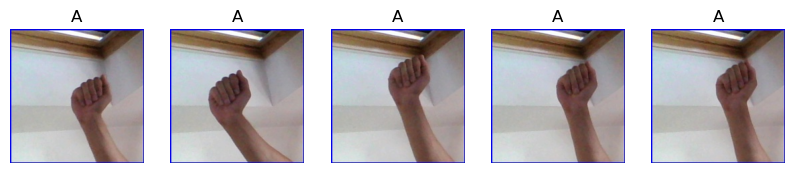

In [3]:
images = []
labels = []

for label in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, label)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')) and not img_name.startswith('.'):
                img = cv2.imread(img_path)  # Read the image
                if img is not None:  # Check if the image is loaded
                    img = cv2.resize(img, (200, 200))  # Resize if needed
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to load image at {img_path}")

images = np.array(images)
labels = np.array(labels)

# Display the first 5 images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [4]:
# Print class names
class_names = train_ds.class_names

num_classes = len(class_names)

for class_name in class_names:
    print(class_name)
    
print(num_classes)

A
B
C
D
E
5


# `Step 3: Data Preparation/Preprocessing`

## Data Normalization: 

Each image data is stored as a two-dimensional array of pixel values ranging from 0 to 255, representing the intensity of light at each pixel. 

**Normalizing the data ensures that all input values are within the same scale, which helps the neural network converge faster during training.** 

Normalizing by dividing with 255 scales the pixel values from 0 to 255 to a range between 0 and 1, ensuring uniformity across the dataset. This process maintains the relative relationships between pixel intensities while facilitating faster convergence during model training, thus improving the performance of the model.


In [5]:
# Normalize the images (convert pixel values from 0-255 to 0-1)
images = images.astype('float32') / 255.0

## One-Hot Encoding for Labels:
Convert the labels into a one-hot encoded format since we’re going to use categorical cross-entropy as our loss function.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

# Encode labels to numeric values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

## Train-Test Split: 
Divide your dataset into training and testing sets. You can use train_test_split from sklearn.model_selection to do this:

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [8]:
print(f"Number of training samples: {X_train.shape[0]}")


Number of training samples: 440


In [9]:
X_train[0]

array([[[1.        , 0.01960784, 0.        ],
        [0.98039216, 0.00392157, 0.        ],
        [0.972549  , 0.        , 0.03921569],
        ...,
        [0.96862745, 0.        , 0.01176471],
        [0.9882353 , 0.00392157, 0.00784314],
        [0.9882353 , 0.00392157, 0.        ]],

       [[0.98039216, 0.        , 0.        ],
        [0.9137255 , 0.        , 0.00392157],
        [0.81960785, 0.01960784, 0.07058824],
        ...,
        [0.7607843 , 0.01960784, 0.05490196],
        [0.83137256, 0.01176471, 0.02745098],
        [0.87058824, 0.01568628, 0.01568628]],

       [[0.972549  , 0.        , 0.02352941],
        [0.827451  , 0.02352941, 0.05882353],
        [0.56078434, 0.11372549, 0.16862746],
        ...,
        [0.9411765 , 0.6666667 , 0.7176471 ],
        [1.        , 0.6       , 0.6431373 ],
        [0.6431373 , 0.03529412, 0.0627451 ]],

       ...,

       [[0.95686275, 0.00392157, 0.01960784],
        [0.7529412 , 0.01176471, 0.01568628],
        [0.83137256, 0

In [10]:
X_train_full = images
y_train_full = labels

# Check the total number of samples before slicing
total_samples = X_train.shape[0]
split_index = int(0.8 * total_samples)  # Adjust to a 90/10 split

# Split into training and validation sets
X_train = X_train_full[:split_index]
x_val = X_train_full[split_index:]

y_train = y_train_full[:split_index]
y_val = y_train_full[split_index:]

In [11]:
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of validation samples: {x_val.shape[0]}")

Number of training samples: 352
Number of validation samples: 198


In [12]:
print("training features shape", X_train.shape)
print("training labels shape", y_train.shape)

print("validation features shape", x_val.shape)
print("validation labels shape", y_val.shape)

print("test features shape", X_test.shape)
print("test labels shape", y_test.shape)

training features shape (352, 200, 200, 3)
training labels shape (352, 5)
validation features shape (198, 200, 200, 3)
validation labels shape (198, 5)
test features shape (110, 200, 200, 3)
test labels shape (110, 5)


# `Step 4: Model Selection`
Now that your data is prepared, the next step involves selecting a model. Since you are dealing with images, Convolutional Neural Networks (CNNs) are typically effective for this type of task. You can create a simple CNN architecture using Keras:

### Activation Functions

Activation functions are used to introduce nonlinearity into the neural network, allowing it to learn more complex patterns in the data. Common activation functions include `ReLU`, `sigmoid`, and `tanh`.

Let us build a simple architecture  comprising three layers:

- Input Layer (Flatten): Reshapes the input data from a 28x28 matrix to a flat vector of 784 elements.

- Hidden Layer (Dense): Consists of 128 neurons with a sigmoid activation function, which introduces non-linearity to the model and allows it to learn complex patterns in the data.

- Output Layer (Dense): Comprises 10 neurons representing the output classes (since we have 10 classes in the Fashion MNIST dataset) with a softmax activation function, which computes the probabilities of each class.

In [13]:
from tensorflow.keras import Model
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [14]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(5, activation='softmax'))

In [15]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(5, activation='softmax'))

/Users/kendihasko/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# `Step 5: Training the Model`
Compiling and training our model using the prepared dataset:

### Compiling the model

Compiling the model configures its learning process, defining crucial aspects such as the optimizer, loss function, and evaluation metrics.

The key parameters are:

- **optimizer**: Determines the optimization algorithm used during training, such as Adam, SGD (Stochastic Gradient Descent), etc.
- **loss**: Defines the objective function the model aims to minimize during training, such as cross-entropy for classification tasks.

- **metrics**: Specifies the metrics used to monitor the model's performance during training, such as accuracy.

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training is the process where a model learns from data by adjusting its internal parameters, aiming to minimize the difference between predicted and actual outcomes. Through techniques like gradient descent, the model gradually improves its ability to recognize patterns, enhancing its accuracy in making predictions on new data.

- **Defining Training Parameters**: Specify the number of epochs (iterations over the entire dataset) and the batch size (number of samples processed before updating the model).

- **Training the Model**: Use the fit method to train the model on the training data (`X_train` and `y_train`). Provide validation data (`X_valid` and `y_valid`) to monitor the model's performance during training.


- **Monitoring Performance**: During training, the model's performance metrics (such as loss and accuracy) on both the training and validation sets are recorded in the history object for analysis.

In [17]:
# Assuming you have image data and label data in your tf.data.Dataset
dataset = train_ds.map(lambda x, y: (tf.ensure_shape(x, (None, 200, 200, 3)), tf.ensure_shape(y, (None,))))

# Then batch the data correctly
dataset = train_ds.batch(batch_size=64)


In [18]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Callbacks: Reduce learning rate and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



# Train the model using the original training data and early stopping
history = model.fit(X_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=20,
                    batch_size=64,
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.5281 - loss: 1.9725 - val_accuracy: 0.4444 - val_loss: 2.4194 - learning_rate: 0.0010
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.9505 - loss: 0.2076 - val_accuracy: 0.4444 - val_loss: 2.6125 - learning_rate: 0.0010
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.9975 - loss: 0.0435 - val_accuracy: 0.4444 - val_loss: 2.4472 - learning_rate: 0.0010
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.9945 - loss: 0.0692 - val_accuracy: 0.4545 - val_loss: 2.2650 - learning_rate: 0.0010
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.9956 - loss: 0.0481 - val_accuracy: 0.5303 - val_loss: 2.1284 - learning_rate: 0.0010
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9956 - loss: 0.0419 - val_accuracy: 0.5556 - val_loss: 2.0119 - learning_rate: 0.0010
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 0.9964 - loss: 0.0312 - val_accuracy: 0.5758 - val_l

In [19]:
from tensorflow import keras

input_layer = keras.layers.Input(shape=(200, 200, 3))
irv2 = keras.applications.Xception(weights='imagenet',include_top=False,input_tensor = input_layer)
global_avg = keras.layers.GlobalAveragePooling2D()(irv2.output)
dense_1 = keras.layers.Dense(5,activation = 'softmax')(global_avg)
model = keras.Model(inputs=irv2.inputs,outputs=dense_1)

model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 99, 99,    │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 99, 99,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 99, 99,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 97, 97,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 97, 97,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 97, 97,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 97, 97,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 97, 97,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 97, 97,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 97, 97,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 97, 97,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 49, 49,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 49, 49,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 49, 49,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 49, 49,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 49, 49,    │          0 │ add[0][0]       

 Total params: 20,871,725 (79.62 MB)

 Trainable params: 20,817,197 (79.41 MB)

 Non-trainable params: 54,528 (213.00 KB)

## Save the model

To save and load Keras models, you should use the built-in methods provided by Keras, after training the model (until we are satisfied with its performance)


In [22]:
# Save the entire model
model.save('asl_final.keras')

## Visualize accuracy and loss
Visualizing accuracy and loss during training provides insights into the model's performance and training dynamics:

Accuracy: Plots of training and validation accuracy over epochs show how well the model is learning. Higher values indicate better performance. Discrepancies between training and validation curves may signal overfitting or underfitting.

Loss: Plots of training and validation loss over epochs illustrate how well the model is minimizing errors. Lower values indicate better performance. Discrepancies between training and validation curves can indicate issues like overfitting or poor generalization.

By monitoring these metrics, we can diagnose model behavior, optimize hyperparameters, and determine whether further training or adjustments are necessary for better performance.

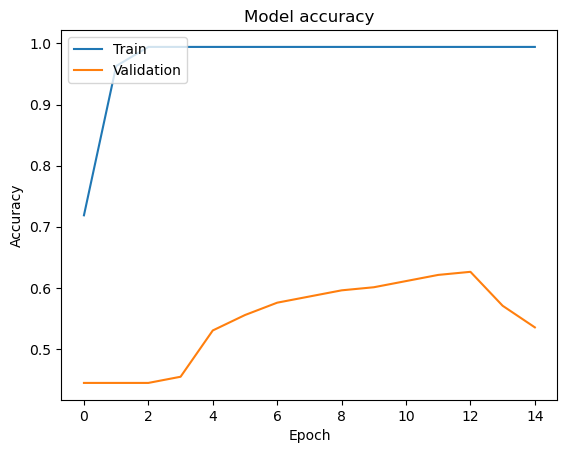

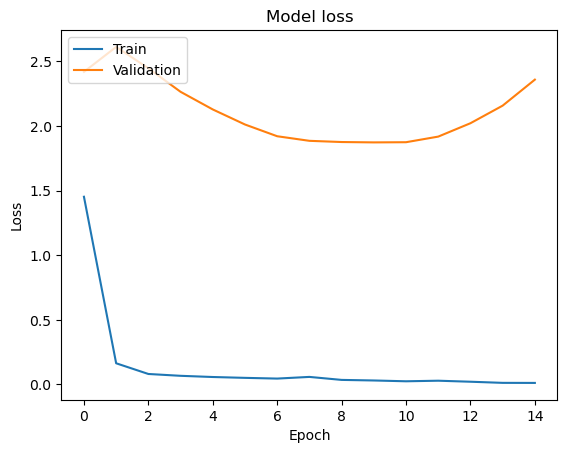

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Test accuracy


Measuring the accuracy of test data assesses how well the trained model generalizes to new, unseen data. It provides an objective evaluation of the model's performance on real-world scenarios, indicating its ability to make accurate predictions beyond the training set. 

In [29]:
from tensorflow.keras.models import load_model

# Load the model
final_model = load_model('asl_final.keras')

final_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
test_loss, test_acc = final_model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1733 - loss: 1.9061
Test accuracy 0.15454545617103577
Test loss 1.9415953159332275


# How can I improve my model?
## Experiment with Model Architecture:
- Try adding more layers or neurons to the existing architecture to increase model complexity.
- Explore different activation functions, such as ReLU or tanh, to introduce non-linearity and capture more intricate patterns in the data.
- Experiment with different types of layers, such as dropout or batch normalization, to improve generalization and prevent overfitting.
## Optimize Hyperparameters:
- Adjust the learning rate of the optimizer to control the size of the steps taken during gradient descent.
- Explore different optimization algorithms, such as Adam, SGD, or RMSprop, to find the one that works best for your dataset.
- Tune batch size, number of epochs, and other training parameters to achieve better convergence and prevent underfitting or overfitting.